In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as ss
import common_func as cf

In [123]:
def find_trend(y, years):
    X_sm = sm.add_constant(years)
    lr = sm.OLS(y, X_sm).fit()
    print(lr.summary(alpha = 0.1))
    return lr.params
    

In [124]:
def fit_exp(maxP, years):
    lnmaxP = np.log(maxP)
    alpha, beta = find_trend(lnmaxP, years)
    ybar,std, skew = cf.findmoments(lnmaxP)
    print(ybar,std, skew)
    n =len(years)
    tbar = np.mean(years)
    print(tbar)
    zp = ss.norm.ppf(0.99)
    print(zp)
    xp = np.exp(ybar + beta*(years - tbar) + zp * std)
    return xp,beta
    

In [131]:
def vogel_results(beta,del_t, rp,std):
    mag_f = np.exp(beta * del_t)
    cdf = 1-1/rp
    z_po = ss.norm.ppf(cdf)
    T_f = 1 /(1 - ss.norm.cdf(z_po -  beta * del_t/ std))
    return mag_f, T_f

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.648
Date:                Sat, 26 Feb 2022   Prob (F-statistic):             0.0602
Time:                        16:50:52   Log-Likelihood:                -24.507
No. Observations:                  73   AIC:                             53.01
Df Residuals:                      71   BIC:                             57.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const         -6.2205      3.785     -1.644      0.1

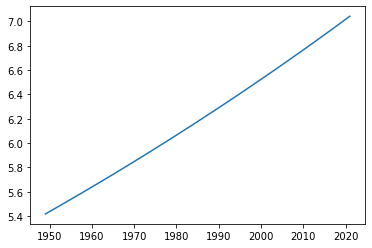

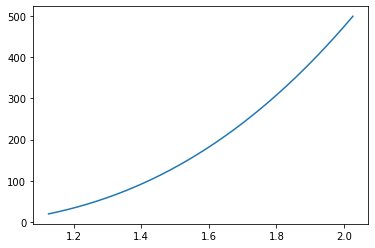

In [138]:
data = pd.read_csv('precip.csv')
maxP, years = cf.annual_max(data)
lnmaxP = np.log(maxP)
ybar,std, skew = cf.findmoments(lnmaxP)
m, beta = fit_exp(maxP, years)
zp = ss.norm.ppf(0.99)
xp = np.exp(ybar + zp * std)
print(xp)
plt.plot(years,m)
plt.show()
return_periods = np.arange(20,500)
mag_f, T_f = vogel_results(0.1,10, return_periods,std)
plt.plot(T_f, return_periods)
plt.show()